Acceptance ratio=  0.82425
<Energy>= 39.94760907470386
<Energy^2>= 4817.007181084463
Error= 0.040132254548549226
Acceptance ratio=  0.8443765


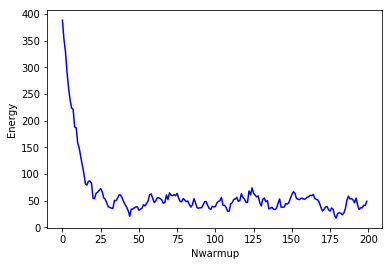

In [1]:
### Exercise 1: Classical gas in 1D: 

###Challenege 3: 4-7

# In this case, we assume that the particles do not interact and the particle velocities 
#are continuous and unbounded. The energy is the sum of the kinetic energies of the individual 
#particles. Hence, for and ideal gas, the only coordinates of interest are the velocities. 
#In order to change a configuration, we choose a particle at random and change its velocity by 
#a random amount according to the corresponding transition probability. 
#For simplicity we consider only the one-dimensional case.

###########

# Part 4: Compute the mean energy per particle for  T=10, 100 and 400
# approximate number of warmup steps for N=10 and T=100, and for N=40 and T=100? 


# Part 5: Compute the probability  P(E)dE for the system of  N  particles
#to have a total energy between  E  and  E+dE. Do you expect  P(E) to be proportional 
#to  e−βE Plot  P(E)  as a function of  E  and describe the qualitative behavior of  P(E). 
#Does the plot of  ln(P(E)) yield a straight line?

#Part 6: Compute the mean energy for  T=10 ,20 ,30 ,... 90 ,  100  and 110  
#and estimate the heat capacity.


#Part7:Compute the mean square energy fluctuations  ⟨ΔE2⟩=⟨E2⟩−⟨E⟩2 for T=10  and T=40
#Compare the magnitude of the ratio  ⟨ΔE2⟩/T2 with the heat capacity determined in the previous item.



%matplotlib inline
import numpy as np
from matplotlib import pyplot

nwalkers = 20
v = np.zeros(nwalkers)
v.fill(20)
T = 80
delta = 5

def metropolis(vold):
    global delta, T
    vtrial = np.random.random()    
    vtrial = vold+(2*vtrial-1)*delta
    weight = np.exp(-(vtrial**2-vold**2)/T)
    vnew = vold
    if(weight >= 1): #Accept
        vnew = vtrial
    elif(weight != 0):
        r = np.random.random()
        if(r <= weight): #Accept
            vnew = vtrial
    return vnew
# Warmup loop

Nwarmup = 200
Ewarmup = np.zeros(Nwarmup)

Naccept = 0.
for j in range(Nwarmup):
    for i in range(nwalkers):
        vold = v[i]
        v[i] = metropolis(v[i])
        if(v[i] != vold):
            Naccept += 1
        
    Ewarmup[j] = np.sum(v**2)/nwalkers

x = np.arange(0,Nwarmup,1)
pyplot.plot(x,Ewarmup,ls='-',c='blue');
pyplot.xlabel('Nwarmup')
pyplot.ylabel('Energy')

print("Acceptance ratio= ", Naccept/float(Nwarmup*nwalkers))

# Measurement loop

Nmeasure = 100000
Naccept = 0.
E = 0.
E2 = 0.
for j in range(Nmeasure):
    for i in range(nwalkers):
        vold = v[i]
        v[i] = metropolis(v[i])
        if(v[i] != vold):
            Naccept += 1

    E += np.sum(v**2)
    E2 += np.sum(v**4)

E = E/Nmeasure/nwalkers
E2 = E2/Nmeasure/nwalkers
print("<Energy>=", E)
print("<Energy^2>=", E2)
print("Error=", np.sqrt((E2-E**2)/Nmeasure/nwalkers))

print("Acceptance ratio= ", Naccept/float(Nmeasure*nwalkers))



Text(0, 0.5, '<E>')

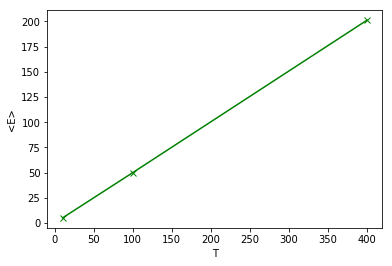

In [4]:
## mean energy per particle T=10,100 and 400
#at equilibrium: <E> = T/2

array_T=[10,100,400]
nwalkers = 20 

Nwarmup=[0,0,0]
avgE=np.zeros(len(array_T))
avgE2=np.zeros(len(array_T))
Nmeasure=100000
for l in range (len(array_T)):
    v = np.zeros(nwalkers)
    v.fill(20)
    T=array_T[l]
    Nwarmup[l]=0
    Ewarmup = np.sum(v**2)/nwalkers
    while (Ewarmup >= T/2):
        for i in range(nwalkers):
            vold = v[i]
            v[i] = metropolis(v[i])
        Ewarmup = np.sum(v**2)/nwalkers    
        Nwarmup[l] +=1
    for j in range(Nmeasure):
        for i in range(nwalkers):
            vold = v[i]
            v[i] = metropolis(v[i])
            
        avgE[l] += np.sum(v**2)
        avgE2[l] += np.sum(v**4)
        
    avgE[l] = avgE[l]/Nmeasure/nwalkers
    avgE2[l] = avgE2[l]/Nmeasure/nwalkers
    
pyplot.plot(array_T,avgE,marker='x',c='green')
pyplot.xlabel('T')
pyplot.ylabel('<E>')


Text(0, 0.5, 'Error')

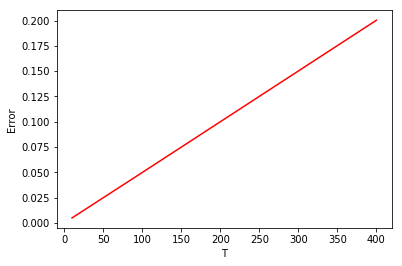

In [5]:
pyplot.plot(array_T, np.sqrt((avgE2-avgE**2)/Nmeasure/nwalkers), c='red')
pyplot.xlabel('T')
pyplot.ylabel('Error')

In [7]:
#for N=10,100 &&&  40, 100

nwalkers = 10 

Nwarmup=0


v = np.zeros(nwalkers)
v.fill(20)
T=100
Nwarmup=0
Ewarmup = np.sum(v**2)/nwalkers
while (Ewarmup >= T/2):
    for i in range(nwalkers):
        vold = v[i]
        v[i] = metropolis(v[i])
    Ewarmup = np.sum(v**2)/nwalkers    
    Nwarmup +=1
print('\nNwarmup(N=10) =',Nwarmup,'\n')  

nwalkers = 10 

Nwarmup=0
v = np.zeros(nwalkers)
v.fill(20)
T=100
Nwarmup=0
Ewarmup = np.sum(v**2)/nwalkers
while (Ewarmup >= T/2):
    for i in range(nwalkers):
        vold = v[i]
        v[i] = metropolis(v[i])
    Ewarmup = np.sum(v**2)/nwalkers    
    Nwarmup +=1
print('\nNwarmup (N=40) =',Nwarmup,'\n')



Nwarmup(N=10) = 33 


Nwarmup (N=40) = 42 



Text(0, 0.5, 'p(<E>)')

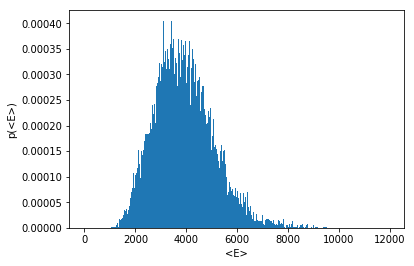

In [11]:
nwalkers = 20 
v = np.zeros(nwalkers)

T = 400
delta = 5
vstar=np.sqrt(T/2)
v.fill(vstar)
Estar = T * nwalkers / 2

# Warmup loop

Nwarmup = 10000
Ewarmup = np.zeros(Nwarmup)


for j in range(Nwarmup):
    for i in range(nwalkers):
        vold = v[i]
        v[i] = metropolis(v[i])
        
        
    Ewarmup[j] = np.sum(v**2) # energy of the system
    
binwidth = Estar/100
pyplot.hist(Ewarmup,bins=np.arange( 0,3 * Estar, binwidth),density=True);    

pyplot.xlabel('<E>')
pyplot.ylabel('p(<E>)')

Text(0, 0.5, 'ln(p(E))')

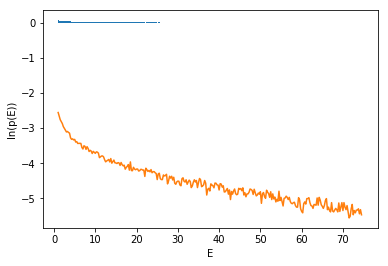

In [13]:
##########
#probability
###

nwalkers = 100000 
v = np.zeros(nwalkers)

T = 100
delta = 5
vstar=np.sqrt(T/2)
v.fill(vstar)
Estar = T / 2
E = np.zeros(nwalkers)


# Warmup loop

Nwarmup = 100 # reaching equilibrium
Ewarmup = np.zeros(Nwarmup)


for j in range(Nwarmup):
    for i in range(nwalkers):
        vold = v[i]
        v[i] = metropolis(v[i])
        
        
    
for i in range(nwalkers):
    v[i] = metropolis(v[i])
    E[i]=v[i]**2
binwidth = Estar/200
Emax=1.5 * Estar
ax=pyplot.hist(E,bins=np.arange( 1,Emax, binwidth),density=True);    
[p,Energy]=np.histogram(E,bins=np.arange( 1,Emax, binwidth),density=True)
pyplot.xlabel('E')
pyplot.ylabel('p(E)')
###############

pyplot.plot(np.arange( 1,Emax-binwidth, binwidth), np.log(p))
pyplot.xlabel('E')
pyplot.ylabel('ln(p(E))')

Text(0, 0.5, 'Cv')

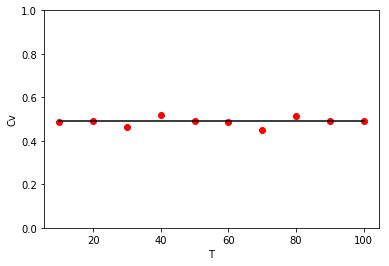

In [16]:
#####heat capacity

nwalkers = 10000 
v = np.zeros(nwalkers)
array_T = np.arange(10,110,10)
delta = 5
vstar=np.sqrt(T/2)
Estar = T / 2
v.fill(vstar)
Ei = np.zeros(nwalkers)
E2i = np.zeros(nwalkers)
Nwarmup = 50 # equilibrium
CV=np.zeros(len(array_T))
Eavg=np.zeros(len(array_T)) #avg energy over all ensembles 


for k in range(len(array_T)):
    T = array_T[k]
    E=0
    E2=0

    for j in range(Nwarmup):
        for i in range(nwalkers):
            v[i] = metropolis(v[i])
        
        for i in range(nwalkers):
            v[i] = metropolis(v[i])
            Ei[i]=v[i]**2
            E2i[i]=Ei[i]**2
        E=np.sum(Ei)/nwalkers
    Eavg[k]=E
    E2= np.sum(E2i)/nwalkers 

    CV[k]= (E2-E**2)/(T**2)
    
    
CVnew=np.diff(Eavg)/np.diff(array_T)
CVnew=np.mean(CVnew)
pyplot.plot(array_T,CV,'ro',label='$(<E^2>-<E>^2)/T$')
pyplot.plot(array_T,np.linspace(CVnew,CVnew,len(array_T)),'k-',label='$\Delta E/\Delta T$')

pyplot.ylim(0,1)
pyplot.xlabel('T')
pyplot.ylabel('Cv')
